# Checking HDF5 files

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Load

In [51]:
import h5py

path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/'
fname  = path+'Buzzard_v2.0_Y3a_bpz.h5'
fname_aux  = path+'Buzzard-3_v2.0_Y3a_mastercat.h5'

master = h5py.File(fname)
indexes= h5py.File(fname_aux)

In [3]:
ls /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

buzzard_1.9.9_3y3a_rsshift_run.h5  Buzzard_v2.0_Y3a_gold.h5
Buzzard-3_v2.0_Y3a_mastercat.h5    Buzzard_v2.0_Y3a_shape.h5
Buzzard_v2.0_Y3a_bpz.h5            nohup.out


In [47]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [48]:
master.visititems(show_h5_group)

(u'catalog', <HDF5 group "/catalog" (1 members)>)
(u'catalog/gold', <HDF5 group "/catalog/gold" (46 members)>)
(u'masks', <HDF5 group "/masks" (1 members)>)
(u'masks/gold', <HDF5 group "/masks/gold" (1 members)>)


In [52]:
master.visititems(show_h5_dataset)

(u'catalog/bpz/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1504210222,), type ">i8">)
(u'catalog/bpz/redshift_cos', <HDF5 dataset "redshift_cos": shape (1504210222,), type ">f8">)
(u'catalog/bpz/z', <HDF5 dataset "z": shape (1504210222,), type ">f8">)
(u'catalog/bpz/zmc_sof', <HDF5 dataset "zmc_sof": shape (1504210222,), type ">f8">)
(u'catalog/bpz/zmean_sof', <HDF5 dataset "zmean_sof": shape (1504210222,), type ">f8">)


In [7]:
#master['masks/gold'].visititems(show_h5_dataset)

### Gold Catalog

In [8]:
master.visititems(show_h5_dataset)

(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1504210222,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (1504210222,), type ">f4">)
(u'catalog/gold/flags_gold', <HDF5 dataset "flags_gold": shape (1504210222,), type ">i8">)
(u'catalog/gold/flux_g', <HDF5 dataset "flux_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_i', <HDF5 dataset "flux_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_r', <HDF5 dataset "flux_r": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_z', <HDF5 dataset "flux_z": shape (1504210222,), type ">f4">)
(u'catalog/gold/haloid', <HDF5 dataset "haloid": shape (1504210222,), type ">i8">)
(u'catalog/gold/hpix_16384', <HDF5 dataset "hpix_16384": shape (1504210222,), type ">i8">)
(u'catalog/gold/ivar_g', <HDF5 dataset "ivar_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_i', <HDF5 dataset "ivar_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_r', <HDF5 dataset "ivar_r": shape (150

In [9]:
hpxmap = master['masks/gold/hpix'][:]

In [10]:
rhalo = master['catalog/gold/rhalo'][:]

In [11]:
centrals, = np.where(rhalo==0)

In [12]:
m200 = master['catalog/gold/m200'][:]

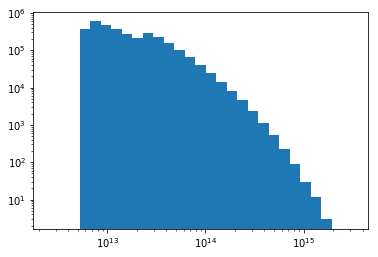

In [17]:
xbins = np.logspace(12.4,15.5,30)
_     = plt.hist(m200[centrals],bins=xbins)
plt.xscale('log')
plt.yscale('log')

In [14]:
centrals.size

509884913

In [15]:
hid = master['catalog/gold/haloid'][:]

In [31]:
hidu, index, counts = np.unique(hid[centrals],return_index=True,return_counts=True)

In [20]:
counts

array([506636113,         1,         1, ...,         1,         1,
               1])

In [32]:
m2x = m200[index]

In [45]:
counts[(counts>1)&(m2x>2e13)]

array([2, 2, 2, ..., 2, 2, 2])

In [46]:
nrepeated = counts[(counts>1)&(m2x>5e13)].size
nhalos    = counts.size

print('percentage of repeated halos: %.2f %%'%(100.*nrepeated/nhalos))

percentage of repeated halos: 0.06 %


In [50]:
nrepeated

1816